In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing

In [2]:
data=pd.read_csv("mammographic_masses.data",names=["bi-rads","age","shape","margin","density","severity"])
data_n=data.values #extracting only the matrix of values 

data = data[(data['bi-rads']!='?') & (data['age']!='?') & (data['shape']!='?') & (data['margin']!='?') & (data['density']!='?') & (data['severity']!='?')]
data = data.astype(int)

X = data[["bi-rads","age","shape","margin","density"]]
y=data[["severity"]].values

##a few examples from the dataset 
X.head()

,bi-rads,age,shape,margin,density
0,5,67,3,5,3
2,5,58,4,5,3
3,4,28,1,1,3
8,5,57,1,5,3
10,5,76,1,4,3


In [3]:
SeverityBR= pd.DataFrame({"bi-rads":data["bi-rads"], "severity":data["severity"]})

BiRads=[1,2,3,4,5]

for n in BiRads:
    SBRnumber=SeverityBR[SeverityBR["bi-rads"]== n]
    l=len(SBRnumber)
    Positive=len(SBRnumber[SBRnumber["severity"] == 1])
    Negative=len(SBRnumber[SBRnumber["severity"] == 0])
    if l== 0:
        print(n, 'has a positive rate of', 0.0)
    else:
        print(n, 'has a positive rate of', Positive/l)

1 has a positive rate of 0.0
2 has a positive rate of 0.0
3 has a positive rate of 0.16666666666666666
4 has a positive rate of 0.22008547008547008
5 has a positive rate of 0.9022082018927445


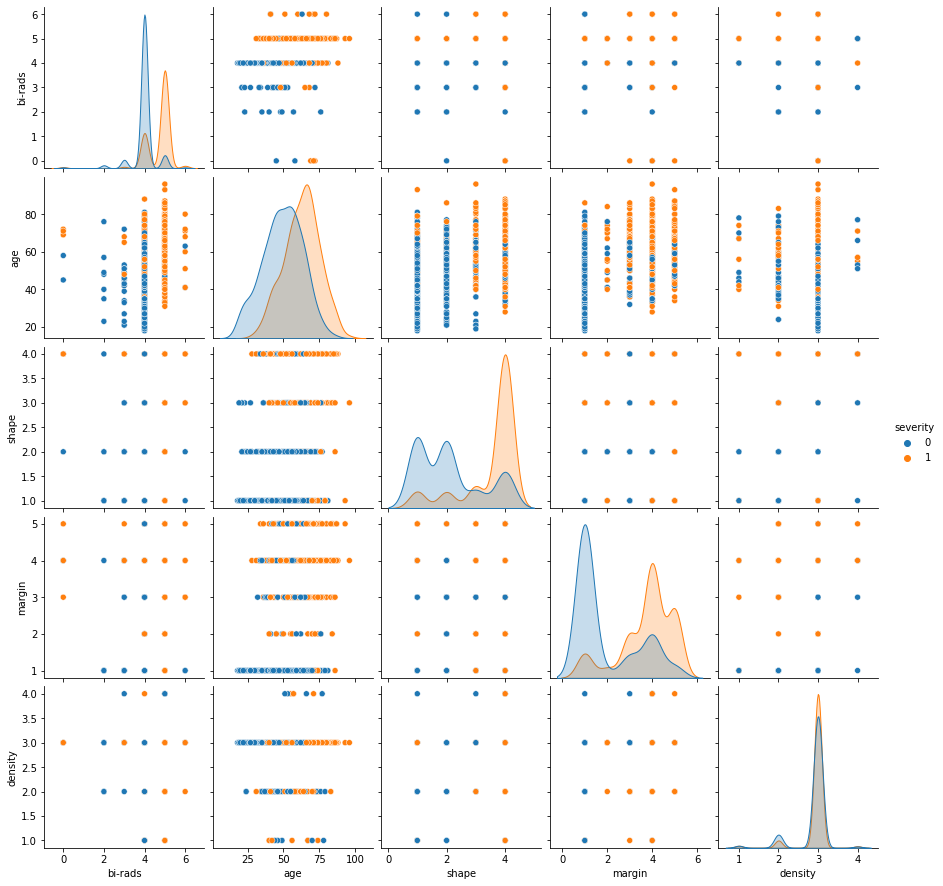

In [4]:
sns.pairplot(data,diag_kind="kde",hue="severity")

In [5]:
poly = sklearn.preprocessing.PolynomialFeatures(degree=5)
p = poly.fit_transform(X)

In [6]:
X = sklearn.preprocessing.normalize(X)
X

array([[0.07406798, 0.99251091, 0.04444079, 0.07406798, 0.04444079],
       [0.08526169, 0.98903556, 0.06820935, 0.08526169, 0.05115701],
       [0.140459  , 0.98321298, 0.03511475, 0.03511475, 0.10534425],
       ...,
       [0.06200246, 0.99203943, 0.06200246, 0.07750308, 0.04650185],
       [0.0751137 , 0.99150078, 0.06009096, 0.0751137 , 0.04506822],
       [0.06415828, 0.99445336, 0.04811871, 0.04811871, 0.04811871]])

In [7]:
from sklearn.linear_model import LogisticRegression

#Ridge Regression (L2 penalty) 
clfL2 = LogisticRegression(penalty="l2") 
clfL2.fit(X,y)
print('Accuracy of log reg classifier with L2 penalty:')
print(clfL2.score(X, y))


#Lasso Regression (L1 penalty) 
clfL1 = LogisticRegression(solver='liblinear',penalty="l1")
clfL1.fit(X,y)
print('Accuracy of log reg classifier with L1 penalty:')
print(clfL1.score(X, y))

Accuracy of log reg classifier with L2 penalty:
0.7289156626506024
Accuracy of log reg classifier with L1 penalty:
0.7843373493975904


C:\Users\nunop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nunop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
clfL1 = LogisticRegression().fit(X, y)

C:\Users\nunop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
print(X)

[[0.07406798 0.99251091 0.04444079 0.07406798 0.04444079]
 [0.08526169 0.98903556 0.06820935 0.08526169 0.05115701]
 [0.140459   0.98321298 0.03511475 0.03511475 0.10534425]
 ...
 [0.06200246 0.99203943 0.06200246 0.07750308 0.04650185]
 [0.0751137  0.99150078 0.06009096 0.0751137  0.04506822]
 [0.06415828 0.99445336 0.04811871 0.04811871 0.04811871]]


In [11]:
print(X[:,0])

[0.07406798 0.08526169 0.140459   0.08692038 0.06550093 0.07096741
 0.10984701 0.06643638 0.0737335  0.05723899 0.06750634 0.0737335
 0.08856844 0.11688115 0.0673626  0.06622662 0.10910895 0.08993329
 0.08602648 0.09156219 0.08684168 0.1018303  0.04928142 0.06639061
 0.07418202 0.07219229 0.05120216 0.07957147 0.07999232 0.07741942
 0.07401116 0.05393109 0.06217059 0.08126121 0.09512169 0.08265874
 0.06959943 0.06716403 0.0811775  0.08823768 0.06227237 0.05466644
 0.07306475 0.09484747 0.0751901  0.15665209 0.06737712 0.06229502
 0.08271528 0.07424742 0.05926739 0.11188735 0.04402255 0.08537347
 0.08002305 0.05453926 0.04977882 0.08427498 0.09156219 0.07996163
 0.11957626 0.06988566 0.08766367 0.069966   0.08401285 0.07112305
 0.069907   0.0900353  0.05920996 0.09681853 0.1631634  0.0604191
 0.14712247 0.0673626  0.12216944 0.07408424 0.06631976 0.05788185
 0.0751901  0.10681908 0.06724826 0.07632921 0.07511158 0.07406798
 0.06213698 0.0723693  0.08468572 0.07986976 0.07871332 0.056022

In [22]:
print(neg)

[False False  True False False False  True  True  True  True False False
 False False False False False  True  True False False  True  True  True
 False  True  True  True False False False  True False  True False False
  True False  True  True  True  True False  True False  True False  True
 False  True  True False False False False False False False False  True
  True  True  True False  True  True  True False  True False  True  True
  True  True False False False  True False False False False  True False
 False  True  True False False False  True False False  True  True  True
  True False  True  True  True False False  True False False  True  True
  True  True False  True  True False  True  True  True  True False False
 False False  True False  True False  True False  True False  True  True
  True  True False  True  True False  True False  True  True False False
  True  True  True  True  True  True False False False  True False  True
  True  True False False  True False  True  True Fa

In [30]:
pos=(y[:,0]==1)
neg=(y[:,0]==0)

# Fit the data to a logistic regression model.
clf = sklearn.linear_model.LogisticRegression()
clf.fit(X, y)

# Retrieve the model parameters.
b = clf.intercept_[0]
w0, w1, w2, w3, w4 = clf.coef_.T

C:\Users\nunop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


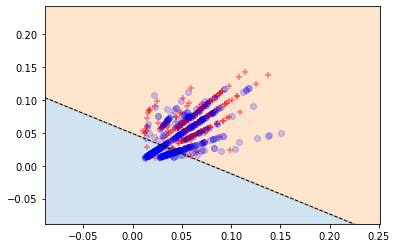

In [35]:

# Calculate the intercept and gradient of the decision boundary.
# este é o gradiente apenas para 2 colunas, se se quiser estudar outras mudar os números do w (os dois a dividir são iguais)
c = -b / w3
m = -w2 / w3  

# Plot the data and the classification with the decision boundary.
# Se se mudar as colunas mudar os números aqui também
xmin, xmax = min(X[:,2]) - 0.1, max(X[:,2]) +0.1
ymin, ymax = min(X[:,3]) - 0.1, max(X[:,3]) +0.1
xd = np.array([xmin, xmax])
yd = m * xd + c
plt.plot(xd, yd, 'k', lw = 1, ls = '--')
plt.fill_between(xd, yd, ymin, color = 'tab:blue', alpha = 0.2)
plt.fill_between(xd, yd, ymax, color = 'tab:orange', alpha = 0.2)

# mudar os numeros aqui também se se for ver outras colunas
plt.scatter(X[pos][:,2],X[pos][:,3], alpha = 0.5, c="r",marker="+")
plt.scatter(X[neg][:,2],X[neg][:,3], alpha = 0.2, c="b",marker="o")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

In [ ]:
# Daqui para baixo é código random que não funciona bem (pelo menos por agora)

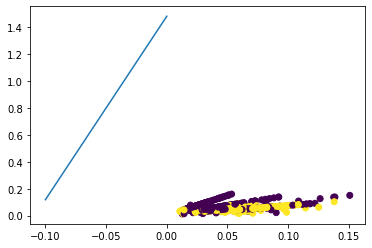

In [9]:
points_x=[x/10. for x in range(-1,+1)]

line_bias = clfL1.intercept_
line_w = clfL1.coef_.T
points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
plt.plot(points_x, points_y)

plt.scatter(X[:,2], X[:,4],c=y)

plt.show()


In [ ]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

In [ ]:
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = p

In [ ]:
sns.set(style="white")

def map_features(x, degree):
    x_old = x.copy()
    x = pd.DataFrame({"intercept" : [1]*x.shape[0]})
    column_index = 1
    for i in range(1, degree+1):
        for j in range(0, i+1):
            x.insert(column_index, str(x_old.columns[1]) + "^" + str(i-j) + str(x_old.columns[2]) + "^" + str(j), np.multiply(x_old.iloc[:,1]**(i-j), x_old.iloc[:,2]**(j)))
            column_index+=1
    return x

def normalize_features(x):
    global mean_values
    global std_values
    for column_name in x.columns[1:]:
        mean = x[column_name].mean()
        std = x[column_name].std()
        x[column_name] = (x[column_name] - mean) / std
        mean_values[column_name] = mean
        std_values[column_name] = std
    return x

def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost(x, y, theta):
    m = x.shape[0]
    h_theta = pd.DataFrame(sigmoid(np.dot(x,theta)))
    cost = 1/m * ((-np.multiply(y,h_theta.apply(np.log)) - np.multiply(1-y, (1-h_theta).apply(np.log))).sum())
    return np.asscalar(cost)

def gradient_descent(x, y, theta):
    global cost_values
    m = x.shape[0]
    iterations = 1000
    alpha = 0.03
    cost_values = pd.DataFrame({'iteration' : [0], 'cost' : [cost(x,y,theta)]})

    for iteration in range(0,iterations):
        theta_old = theta.copy()
        theta.iloc[0,0] = theta.iloc[0,0] - (alpha/m) * np.asscalar((sigmoid(np.dot(x,theta_old)) - y).sum())
        for i in range(1,theta.shape[0]):
            theta.iloc[i,0] = theta.iloc[i,0] - (alpha/m) * np.asscalar(np.multiply((sigmoid(np.dot(x,theta_old)) - y), pd.DataFrame(x.iloc[:,i])).sum())
        c = cost(x,y,theta)
        cost_values = cost_values.append({"iteration" : iteration, "cost" : c}, ignore_index=True)

def predict(x):
    global theta
    probability = np.asscalar(sigmoid(np.dot(x.T,theta)))
    return probability
    if(probability >= 0.5):
        return 1
    else:
        return 0

### Read train data

### Create input data
#x = train_data.loc[:,"exam1":"exam2"]
x = X
### Add intercept column
x.insert(0, "intercept", 1)
mean_values = {}
std_values = {}
mapping_degree = 2
x = normalize_features(x) #normalize features
x = map_features(x, mapping_degree) #map polynomial features
#y = pd.DataFrame(train_data.loc[:,"admit"])
theta = pd.DataFrame({"theta" : [0] * len(x.columns)})

### Test cost of initial theta
# print(cost(x,y,theta))

### Perform Gradient Descent
gradient_descent(x, y, theta)
# print(theta)
# print("Cost: " + str(cost(x,y,theta)))

### Plot iteration vs Cost
plt.scatter(cost_values["iteration"], cost_values["cost"])
plt.show()

### Predict an example
#student = pd.DataFrame({"exam1": [52], "exam2":[63]})
#student.insert(0, "intercept", 1)
#normalizing
#for column_name in student.columns[1:]:
#    student[column_name] = (student[column_name] - mean_values[column_name]) / std_values[column_name]
#student = map_features(student, mapping_degree)
#print("probability of admission: " + str(predict(student.T)))

### Calculate Accuracy
acc = 0
for i in range(0,x.shape[0]):
    p = predict(pd.DataFrame(x.iloc[i,:]))
    actual = y.iloc[i,0]
    if(p >= 0.5):
        p = 1
    else:
        p = 0
    if(p == actual):
        acc+=1
print("Accuracy : " + str((acc/x.shape[0]) * 100))

### Plot decision boundary
x_min = data["exam1"].min()
x_max = data["exam1"].max()
y_min = data["exam2"].min()
y_max = data["exam2"].max()
x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
xx = pd.DataFrame(x_grid.ravel(), columns=["exam1"])
yy = pd.DataFrame(y_grid.ravel(), columns=["exam2"])
z = pd.DataFrame({"intercept" : [1]*xx.shape[0]})
z["exam1"] = xx
z["exam2"] = yy
z = normalize_features(z)
z = map_features(z,mapping_degree)
p = z.apply(lambda row: predict(pd.DataFrame(row)), axis=1)
p = np.array(p.values)
p = p.reshape(x_grid.shape)
plt.scatter(train_data[train_data["admit"] == 0]["exam1"], train_data[train_data["admit"] == 0]["exam2"],marker="o")
plt.scatter(train_data[train_data["admit"] == 1]["exam1"], train_data[train_data["admit"] == 1]["exam2"],marker="x")
plt.contour(x_grid, y_grid, p, levels = [0.5]) #displays only decision boundary
# plt.contour(x_grid, y_grid, p, 50, cmap="RdBu") #display a colored contour

AttributeError: 'numpy.ndarray' object has no attribute 'insert'